# 🧠 Fashion MNIST Classification using Deep Neural Networks
### 📁 Portfolio Project by Aishwarya

This notebook demonstrates a custom deep learning model to classify fashion items from the Fashion MNIST dataset using TensorFlow/Keras. The model architecture, optimizer, and training strategy have been carefully tuned and documented to reflect a strong understanding of neural network design.


## 📌 Project Overview
- **Dataset**: Fashion MNIST (60,000 train, 10,000 test images)
- **Goal**: Classify grayscale 28x28 images into 10 clothing categories
- **Tech Stack**: Python, TensorFlow, Keras, NumPy, Matplotlib
- **Key Features**:
    - Custom neural network architecture
    - Adam optimizer with tuned learning rate
    - Accuracy and loss visualization
    - Model evaluation with confusion matrix and classification report


First let's import TensorFlow and Keras.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

We begin by importing the Fashion MNIST dataset using keras.datasets, which provides convenient access to several popular benchmark datasets.
This dataset comes pre-divided into training and test sets. To improve model evaluation during training, we’ll also carve out a validation set from the training data.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [3]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [4]:
X_train_full.dtype

dtype('uint8')

To evaluate the model during training, we split the original training set into two parts: a smaller training set and a validation set.
Additionally, we normalize the pixel values by scaling them to the range [0, 1] — this is done by dividing each pixel intensity by 255 and converting the values to floating-point numbers. This step ensures faster and more stable convergence during training.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
len(X_valid)

5000

Let's take a quick look at some examples from the dataset. We'll use Matplotlib's imshow() function with the 'binary' colormap to display grayscale images. This helps verify that the data has been loaded and preprocessed correctly. Below is a 5×5 grid of random images from the Fashion MNIST training dataset. This helps build an intuitive understanding of the data before training the model.

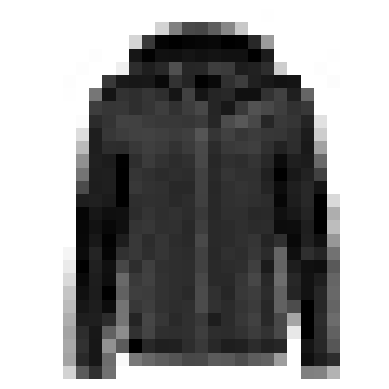

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

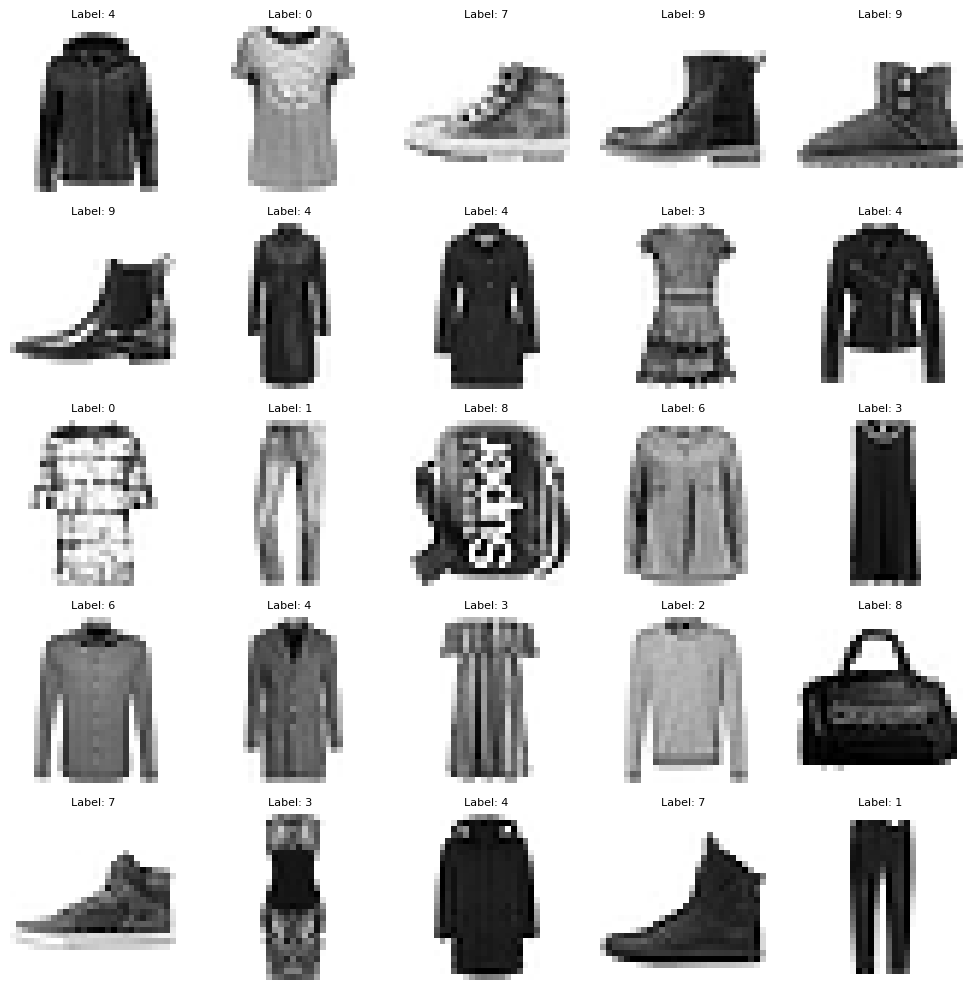

In [7]:
num_rows, num_cols = 5, 5
plt.figure(figsize=(10, 10))

for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i], cmap="binary")
    plt.title(f"Label: {y_train[i]}", fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [9]:
len(y_train)

55000

In [10]:
y_train[0]

np.uint8(4)

Here are the corresponding class names:

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [12]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [13]:
X_valid.shape

(5000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

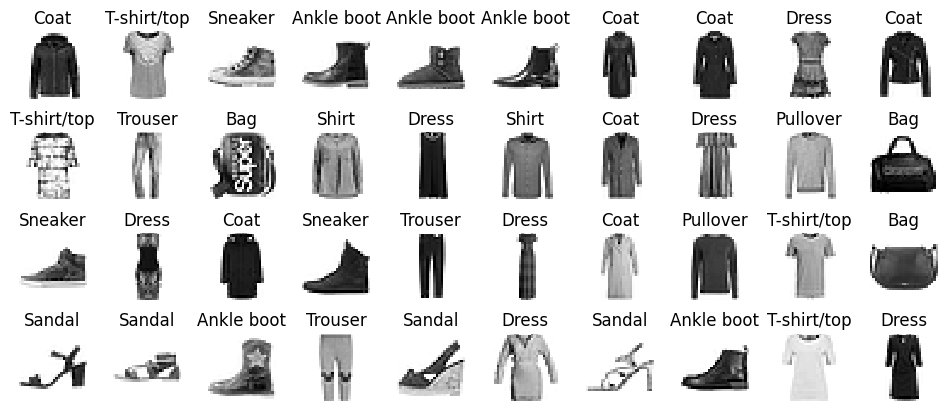

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [18]:
# Define a custom deep neural network
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Increased depth and neuron count
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))

# Output layer for 10 classes
model.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
# 🔄 Resetting the Keras backend and setting random seeds
# This ensures a clean TensorFlow graph, avoids memory clutter from previous models,
# and guarantees reproducible results by fixing the random number generation
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
# 🧠 Display all layers in the model
# Useful for inspecting the model architecture and verifying layer order
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>]

In [21]:
# 📊 Model Architecture Summary
# Displays a layer-by-layer breakdown of the model, including output shapes and parameter counts.
# This is helpful for understanding model complexity and verifying architecture before training.
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

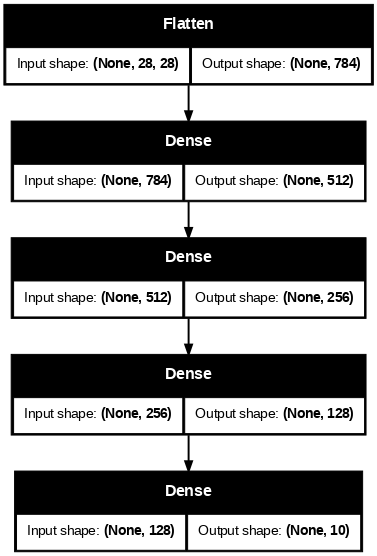

In [23]:
# 🖼️ Visualize and save the model architecture diagram (compact version)
# 'dpi' controls resolution; lower dpi = smaller image
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True, dpi=70)

In [25]:
# 🔍 Access the first hidden layer in the model (index 1, after Flatten layer)
hidden1 = model.layers[1]
# 🏷️ Print the name of the layer (e.g., 'dense_7')
hidden1.name

'dense_7'

In [26]:
# ✅ Verify that accessing the layer by name using `get_layer()` returns the same layer object
model.get_layer(hidden1.name) is hidden1  # Output: True

True

In [27]:
# 📦 Extract the weights and biases from the hidden layer
# `get_weights()` returns a list: [weights_array, biases_array]
weights, biases = hidden1.get_weights()

# 👀 View the weights (a NumPy array of shape [input_size, units])
weights

array([[ 0.06732751,  0.0066223 , -0.03002241, ..., -0.05408647,
         0.01355947, -0.01117355],
       [ 0.0191924 ,  0.03117631, -0.02282537, ..., -0.01488477,
        -0.05473031,  0.05488454],
       [-0.06199498,  0.02283457,  0.00702844, ...,  0.058727  ,
        -0.03787046, -0.04102288],
       ...,
       [ 0.00620648,  0.0430723 ,  0.04149383, ..., -0.06472863,
        -0.0530646 ,  0.06106925],
       [-0.01091399, -0.00815964, -0.05837291, ..., -0.05191381,
         0.02222321, -0.03964606],
       [-0.01265251, -0.0530846 , -0.00845464, ..., -0.05034053,
        -0.04382704, -0.03732062]], dtype=float32)

In [30]:
# Compile the model with Adam optimizer and custom learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [31]:
# Train for more epochs
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7709 - loss: 0.6284 - val_accuracy: 0.8475 - val_loss: 0.4137
Epoch 2/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8565 - loss: 0.3921 - val_accuracy: 0.8691 - val_loss: 0.3555
Epoch 3/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8737 - loss: 0.3440 - val_accuracy: 0.8762 - val_loss: 0.3424
Epoch 4/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8845 - loss: 0.3166 - val_accuracy: 0.8798 - val_loss: 0.3333
Epoch 5/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8913 - loss: 0.2921 - val_accuracy: 0.8796 - val_loss: 0.3338
Epoch 6/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8968 - loss: 0.2732 - val_accuracy: 0.8835 - val_loss: 0.3271
Epoch 7/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9028 - loss: 0.2563 - val_accuracy: 0.8838 - val_loss: 0.3369
Epoch 8/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9076 - 

In [32]:
history.params

{'verbose': 'auto', 'epochs': 20, 'steps': 1547}

In [33]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [34]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

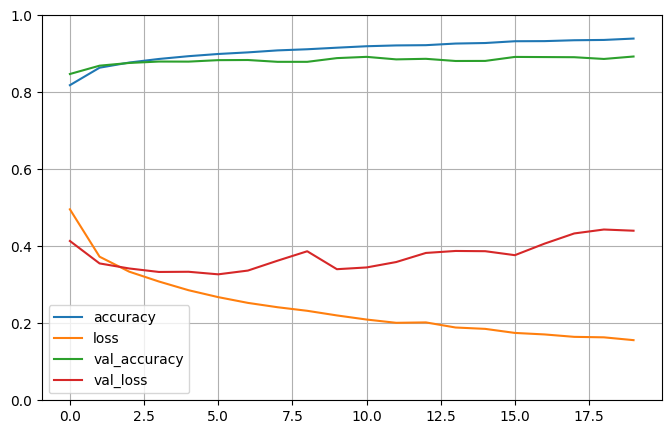

In [35]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

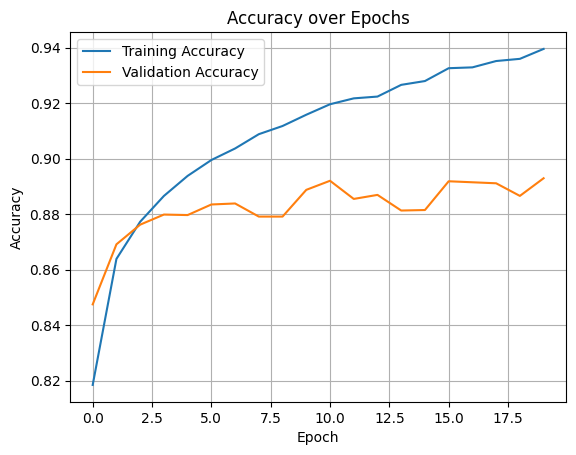

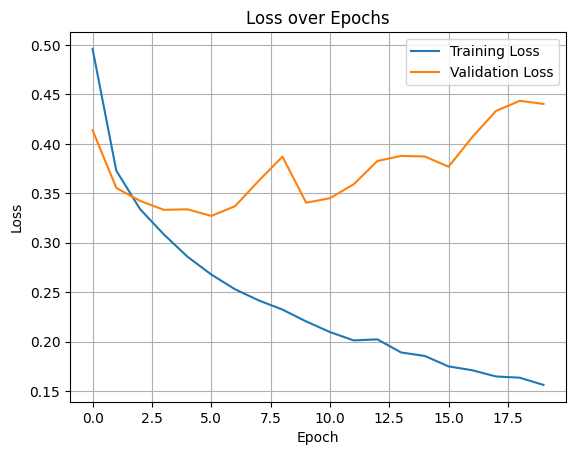

In [36]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()

✅ Training Results & Analysis
After training the model for 20 epochs, we observed the following:

1.Training accuracy steadily improved from ~77% to ~93.8%, indicating that the model successfully learned from the training data.

2.Validation accuracy increased from ~84.7% to ~89.2%, showing good generalization to unseen data.

3.Training loss consistently decreased, confirming convergence.

4.Validation loss began to plateau around epoch 15 and slightly increased afterward, suggesting mild overfitting. Validation loss increase -	A sign of overfitting — the model is starting to memorize training data.

✅ As next steps, we will perform Hyperparameter Tuning, Dropout Regularization and Early Stopping

In [37]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# 🔄 Reset the backend and set seeds for reproducibility
keras.backend.clear_session()
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

# 🧠 Define a more robust neural network with Dropout Regularization
model = keras.models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.3),  # Drop 30% of neurons
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# ⚙️ Compile with tuned learning rate and optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.0005)  # Smaller LR for stable convergence
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# 🛑 Setup EarlyStopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',     # Watch validation loss
    patience=3,             # Stop after 3 epochs with no improvement
    restore_best_weights=True  # Roll back to best model
)

# 🚀 Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_split=0.1,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7215 - loss: 0.7662 - val_accuracy: 0.8444 - val_loss: 0.4261
Epoch 2/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8368 - loss: 0.4457 - val_accuracy: 0.8662 - val_loss: 0.3638
Epoch 3/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8536 - loss: 0.3983 - val_accuracy: 0.8691 - val_loss: 0.3453
Epoch 4/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8641 - loss: 0.3693 - val_accuracy: 0.8711 - val_loss: 0.3527
Epoch 5/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8697 - loss: 0.3544 - val_accuracy: 0.8784 - val_loss: 0.3277
Epoch 6/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8756 - loss: 0.3350 - val_accuracy: 0.8776 - val_loss: 0.3270
Epoch 7/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8800 - loss: 0.3256 - val_accuracy: 0.8798 - val_loss: 0.3128
Epoch 8/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8841 -

🧠 Interpretation

✅ Dropout helped prevent overfitting by introducing randomness

✅ EarlyStopping ensured training didn’t go beyond the optimal point

✅ Lower learning rate improved stability and convergence

In [38]:
# 📊 Evaluate the final model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8839 - loss: 0.3212
Test Accuracy: 0.8853
Test Loss: 0.3231


🧪 Testing the Model on New Data (First 3 Images from Test Set)

In [45]:
# 🔍 Select the first 3 samples from the test set for prediction
X_new = X_test[:3]
y_new = y_test[:3]

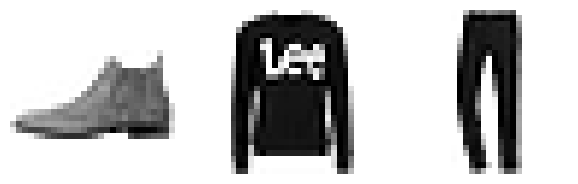

In [46]:
# 🖼️ Display the selected images
import matplotlib.pyplot as plt

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis("off")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

**Let's see what our neural network predicts**

In [47]:
# 🤖 Make predictions using the trained model
# np.argmax is used because model.predict() returns probability scores for each class
y_pred = np.argmax(model.predict(X_new), axis=1)

# 🏷️ Convert numeric predictions to class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Predicted class labels:", y_pred)
print("Predicted class names:", np.array(class_names)[y_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class labels: [9 2 1]
Predicted class names: ['Ankle boot' 'Pullover' 'Trouser']


In [48]:
# ✅ Ground truth for comparison
print("True labels:", y_new)
print("True class names:", np.array(class_names)[y_new])

True labels: [9 2 1]
True class names: ['Ankle boot' 'Pullover' 'Trouser']


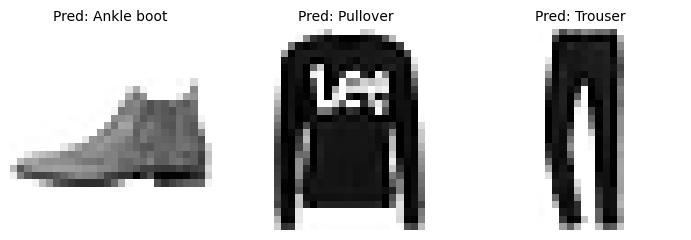

In [49]:
# 🖼️ Visualize images with their predicted labels
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.title(f"Pred: {class_names[y_pred[index]]}", fontsize=10)
    plt.axis("off")
plt.tight_layout()
plt.show()